In [1]:
import pickle, os, h5py
import numpy as np
import matplotlib.pyplot as plt

from msfm.utils import files

# input file

In [2]:
# fit to Buzzard
# data_path = "/global/homes/a/athomsen//multiprobe-simulation-forward-model/data"
# in_bias_file = "metacal_biases_buzzard_0.pkl"

# fit to DES Y3
data_path = "/global/homes/a/athomsen//multiprobe-simulation-forward-model/data"
in_bias_file = "optimal_biases_desy3.pkl"

with open(os.path.join(data_path, in_bias_file), "rb") as f_in:
    bias_table = pickle.load(f_in)

# output file

In [3]:
# out_bias_file = "metacal_biases_buzzard_0.h5"
out_bias_file = "metacal_biases_desy3.h5"
with h5py.File(os.path.join(data_path, out_bias_file), "w") as f_out:
    for key, value in bias_table.items():
        f_out.create_dataset(key, data=value)

    # from elements chat with Jozef, as determined by him
    # f_out.create_dataset("fiducial", data=[1.12507858, 1.06614326, 1.16939598, 1.25172333])

In [4]:
example_key = "cosmo_000132"

print(bias_table[example_key])

conf = files.load_config("/global/homes/a/athomsen/multiprobe-simulation-forward-model/configs/v14/extended.yaml")
metacal_biases = files.read_metacal_bias(example_key, conf)
print(metacal_biases)

[1.4687957763671886, 2.1468841552734403, 2.680456542968754, 4.543714904785164]
[1.44150352 1.54833984 1.72500763 1.86565247]


# plot

In [5]:
metainfo = np.load("../data/CosmoGridV11_original_metainfo.npy")
grid_selection = metainfo["sobol_index"] != -999

sobols = metainfo["sobol_index"][grid_selection][::20]
Oms = metainfo["Om"][grid_selection][::20]
s8s = metainfo["s8"][grid_selection][::20]
S8s = s8s * np.sqrt(Oms / 0.3)

metacal_biases = np.zeros((len(sobols), 4))
for i, sobol in enumerate(sobols):
    metacal_biases[i] = np.array(bias_table[f"cosmo_{sobol:06}"])

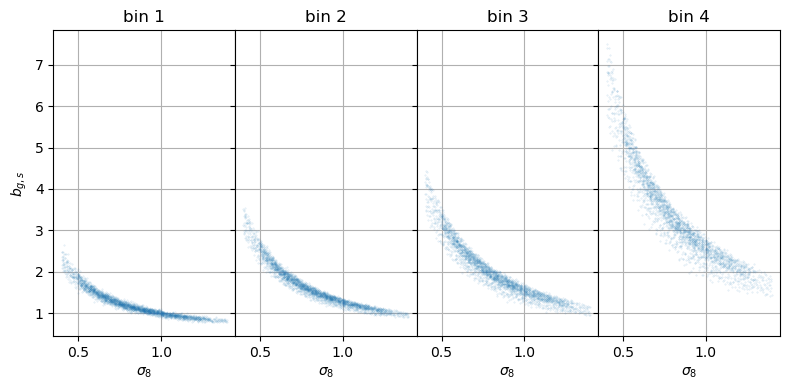

In [6]:
fig, ax = plt.subplots(figsize=(8, 4), ncols=4, sharex=True, sharey=True)

for i in range(4):
    ax[i].scatter(s8s, metacal_biases[:,i], s=0.1, alpha=0.2, zorder=10)
    ax[i].set(xlabel="$\sigma_8$", title=f"bin {i+1}")
    ax[i].grid(True, zorder=0)

ax[0].set(ylabel="$b_{g,s}$")
fig.tight_layout()
plt.subplots_adjust(wspace=0)

